# Space Mission Analysis

#### This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1)

<img src="./Assets/Rockets.jpg" height="300">

#### I created this notebook to explore and analyze space mission and launches since it started until 2020. I am impressed by mankind's hardword and effort to achieve such goals that I couldn't resist but take some time to admire.

## This topic is covered in the following chapters:

### [Preliminary Data Exploration](#Preliminary-Data-Exploration)

### [General Analysis](#general-analysis)

### [Countries Analysis](#countries-analysis)

### [Organisation Analysis](#organisations-analysis)

<br />

# Preliminary Data Exploration

### Import Statements

In [296]:
import pandas as pd
import plotly.express as px
import pycountry
import calendar

### Loading Data

In [297]:
data = pd.read_csv("Mission-Lunches.csv")

### Data Exploration

In [298]:
print(f"The Shape of the dataset is {data.shape} meaning there is {data.shape[0]} rows and {data.shape[1]} columns.")
print(f'The Columns are {", ".join(data.columns.tolist())}')

The Shape of the dataset is (4323, 7) meaning there is 4323 rows and 7 columns.
The Columns are Organisation, Location, Date, Detail, Rocket_Status, Price, Mission_Status


### Data Cleaning

In [299]:
print("If the dataset has duplicate data: ", data.duplicated().any())
print("If the dataset has NaN data: ", data.isnull().any().values)
print("The only missing data is the price, which make sense since private companies don't want to show their expenses to investors."
      f"\nThe amount of missing data in The 'Price' column is {data['Price'].isnull().sum()}")

If the dataset has duplicate data:  False
If the dataset has NaN data:  [False False False False False  True False]
The only missing data is the price, which make sense since private companies don't want to show their expenses to investors.
The amount of missing data in The 'Price' column is 3360


### Convertion of Data Type

In [300]:
data['Date'] = pd.to_datetime(data["Date"], format='%a %b %d, %Y %H:%M %Z', errors="coerce")
data["Price"] = data["Price"].str.replace(",", "").astype(float)
data.info()

print(f"\nThe amount of missing data in The 'Date' column is {data['Date'].isna().sum()}")
print('We converted the "Price" column to float for future calculation. The "Date" to datetime also for later...')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4323 entries, 0 to 4322
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Organisation    4323 non-null   object             
 1   Location        4323 non-null   object             
 2   Date            4197 non-null   datetime64[ns, UTC]
 3   Detail          4323 non-null   object             
 4   Rocket_Status   4323 non-null   object             
 5   Price           963 non-null    float64            
 6   Mission_Status  4323 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 236.5+ KB

The amount of missing data in The 'Date' column is 126
We converted the "Price" column to float for future calculation. The "Date" to datetime also for later...


### Addition Of New Columns

In [301]:
data["Year"] = data["Date"].dt.year
data["Month"] = data["Date"].dt.month
years = data.groupby(by="Year", as_index=True).size()
months = data.groupby(by="Month", as_index=True).size()
month_names = [calendar.month_name[i] for i in range(1, 13)]
x_values = months.index.astype(int).map(lambda x: month_names[x - 1])
data.drop('Detail', axis=1, inplace=True)

print("We created a new column 'Year' and 'Month' for temporal analysis, and a new column 'x_values' for plotting. We also removed the 'Detail' column since it won't be of any use for us.")

We created a new column 'Year' and 'Month' for temporal analysis, and a new column 'x_values' for plotting. We also removed the 'Detail' column since it won't be of any use for us.


In [302]:
countries = {country.name: country.alpha_3 for country in pycountry.countries}

exceptions = {
    'Gran Canaria': 'ESP',
    'North Korea': 'PRK',
    'South Korea': 'KOR',
    'Pacific Missile Range Facility': 'USA',
    'Yellow Sea': 'CHN',
    'New Mexico': 'USA',
    'Russia': 'RUS',
    'USA': 'USA',
    'Shahrud Missile Test Site': 'IRN',
    'Barents Sea': 'RUS',
    'Iran': 'IRN',
    'Pacific Ocean': 'USA'
}

data['ISO'] = data['Location'].apply(lambda x: exceptions.get(x.split(",")[-1].strip(), countries.get(x.split(",")[-1].strip(), None)))

print('We added the ISO code to the dataset with the help of pycountry because Ploty does not support anything other than ISO codes.'
      '\nAnd I have add some exceptions for the countries that are not in pycountry because time changes a lot.')

We added the ISO code to the dataset with the help of pycountry because Ploty does not support anything other than ISO codes.
And I have add some exceptions for the countries that are not in pycountry because time changes a lot.


In [303]:
print("This is what the final data we will be using will look like:")
data.head(10)

This is what the final data we will be using will look like:


,Organisation,Location,Date,Rocket_Status,Price,Mission_Status,Year,Month,ISO
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,StatusActive,50.00,Success,2020.0,8.0,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,StatusActive,29.75,Success,2020.0,8.0,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,StatusActive,NaN,Success,2020.0,8.0,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,StatusActive,65.00,Success,2020.0,7.0,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,StatusActive,145.00,Success,2020.0,7.0,USA
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2020-07-25 03:13:00+00:00,StatusActive,64.68,Success,2020.0,7.0,CHN
6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",2020-07-23 14:26:00+00:00,StatusActive,48.50,Success,2020.0,7.0,KAZ
7,CASC,"LC-101, Wenchang Satellite Launch Center, China",2020-07-23 04:41:00+00:00,StatusActive,NaN,Success,2020.0,7.0,CHN
8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA",2020-07-20 21:30:00+00:00,StatusActive,50.00,Success,2020.0,7.0,USA
9,JAXA,"LA-Y1, Tanegashima Space Center, Japan",2020-07-19 21:58:00+00:00,StatusActive,90.00,Success,2020.0,7.0,JPN


# General Analysis

### Number Of Space Missions Over The Years

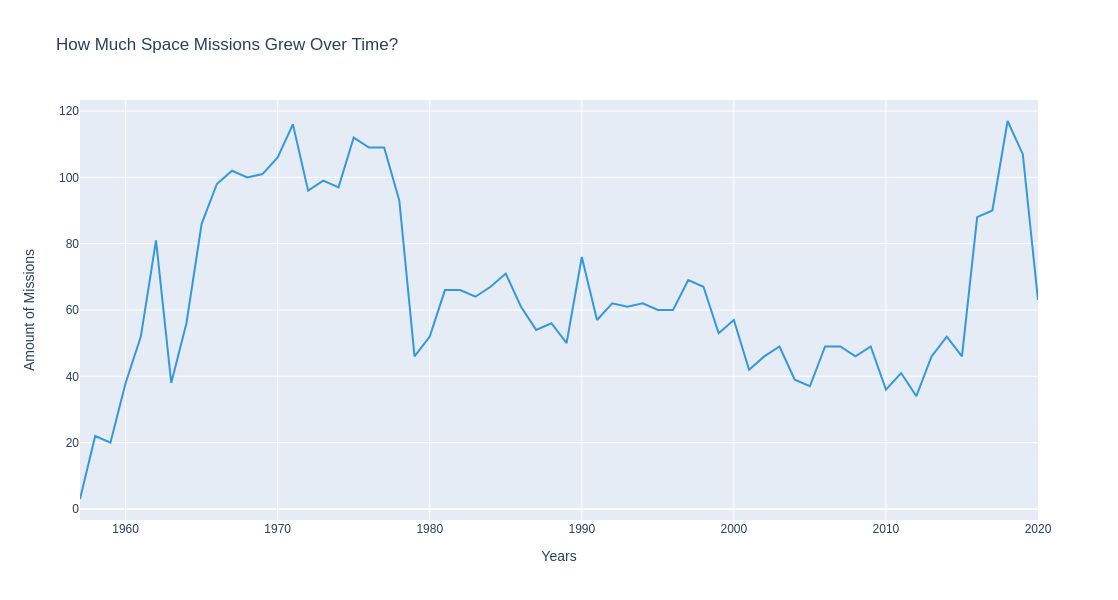

In [304]:
fig = px.line(years,
              x=years.index,
              y=years.values,
              title="How Much Space Missions Grew Over Time?",
              color_discrete_sequence=['#3498db'],
              width=800,
              height=600
)

fig.update_layout(xaxis_title="Years", yaxis_title="Amount of Missions").show()

### Space Missions Over The Months

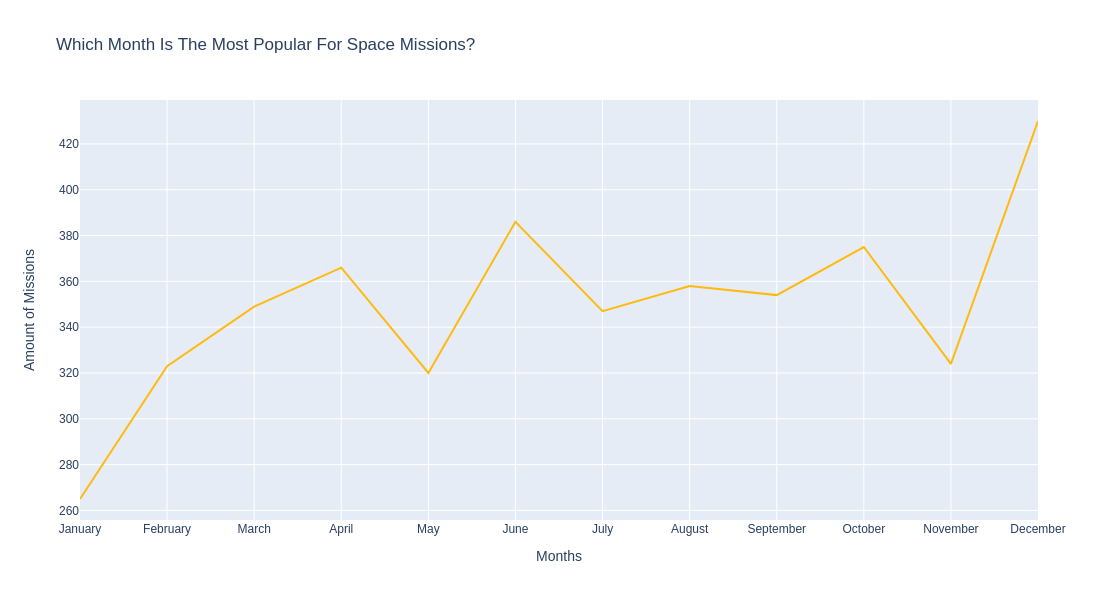

In [305]:
fig = px.line(
    x=x_values,
    y=months.values,
    title="Which Month Is The Most Popular For Space Missions?",
    color_discrete_sequence=['#ffba0f'],
    width=800,
    height=600
)

fig.update_layout(
    xaxis_title="Months",
    yaxis_title="Amount of Missions",
    xaxis=dict(
        tickmode='array',
        tickvals=x_values,
        ticktext=x_values
    )
)

fig.update_traces(hovertemplate='%{y} Missions').show()

### Number Of Successful Missions Vs. Failed Ones

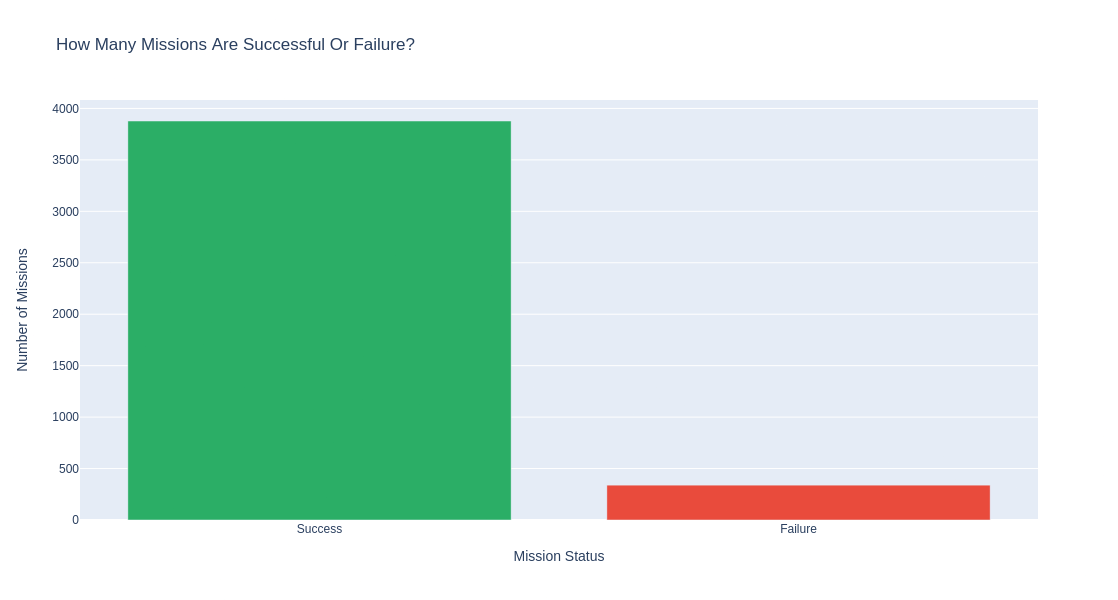

In [306]:
mission_status = data.groupby("Mission_Status", as_index=True).size().sort_values(ascending=False)[:2]

fig = px.bar(mission_status,
             x=mission_status.index,
             y=mission_status.values,
             title="How Many Missions Are Successful Or Failure?",
             color_discrete_sequence=['#2BAE66', '#E94B3C'],
             color=mission_status.index,
             width=800,
             height=600
)

fig.update_layout(xaxis_title="Mission Status",
                  yaxis_title="Number of Missions")

fig.update_traces(hovertemplate='%{y} Missions',showlegend=False).show()

### Number Of Active Vs. Retired Rockets

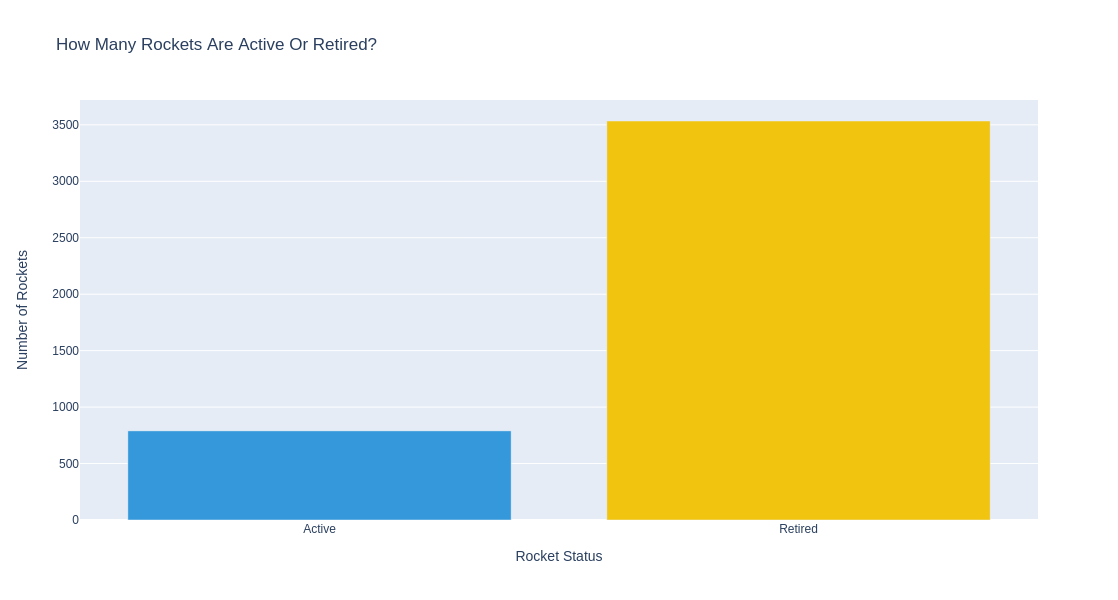

In [307]:
rocket_status = data.groupby("Rocket_Status", as_index=True).size()

fig = px.bar(rocket_status,
             x=rocket_status.index,
             y=rocket_status.values,
             title="How Many Rockets Are Active Or Retired?",
             color_discrete_sequence=['#3498db', '#f1c40f'],
             color=rocket_status.index,
             width=800,
             height=600
)

fig.update_layout(xaxis_title="Rocket Status",
                  yaxis_title="Number of Rockets",
                  xaxis_tickvals=[1, 0],
                  xaxis_ticktext=["Retired", "Active"]
)

fig.update_traces(hovertemplate='%{y} Rockets',showlegend=False).show()

### Special Exploration Expenses Over The Years

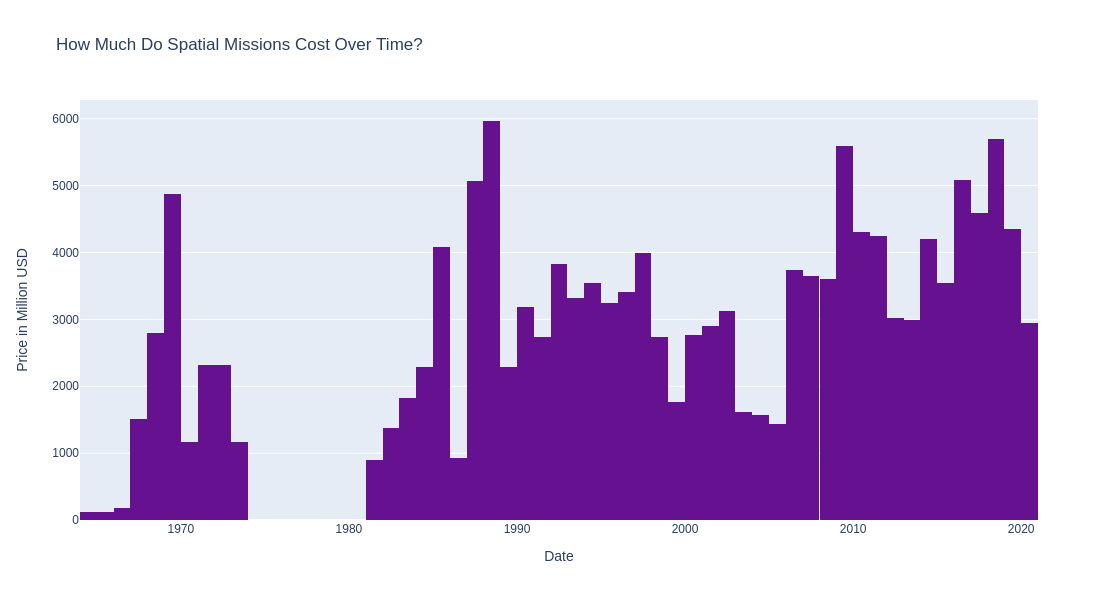

In [308]:
fig = px.histogram(data,
                 x="Date",
                 y="Price",
                 hover_data=data.columns,
                 title="How Much Do Spatial Missions Cost Over Time?",
                 color_discrete_sequence=['#661190'],
                 width=800,
                 height=600,
                 nbins=75
)

fig.update_layout(xaxis_title="Date", yaxis_title="Price in Million USD").show()

### Mission Failure Over The Times

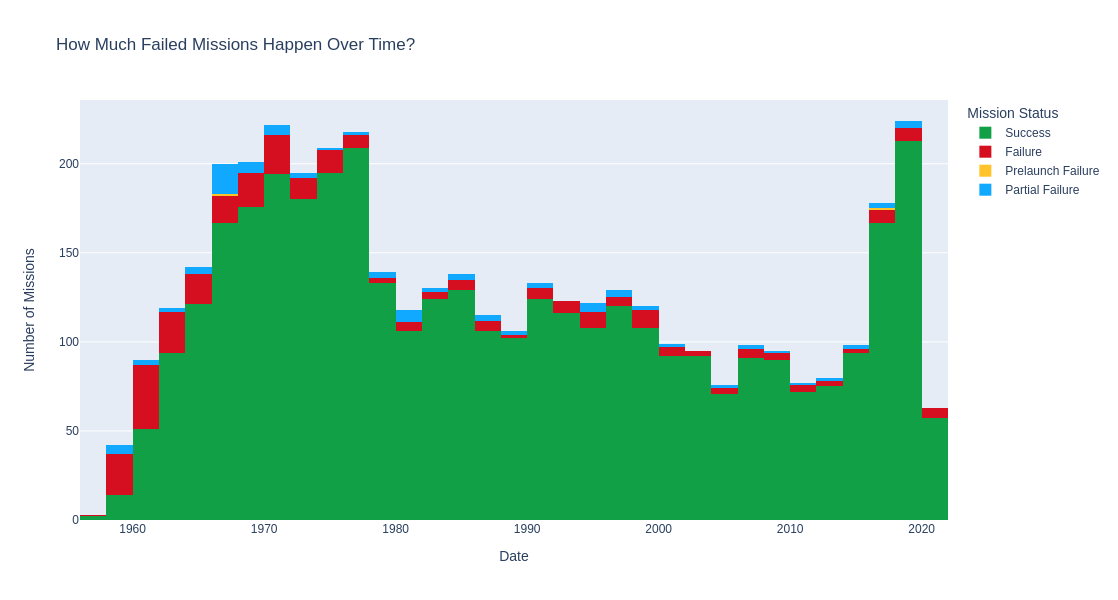

In [309]:
fig = px.histogram(data,
                   x="Date",
                   color="Mission_Status",
                   hover_data=data.columns,
                   color_discrete_sequence=["#11a046", "#d50f1f", "#ffc429", "#11a8ff"],
                   title="How Much Failed Missions Happen Over Time?",
                   width=800,
                   height=600,
                   nbins=60
)

fig.update_layout(legend_title="Mission Status", xaxis_title="Date", yaxis_title="Number of Missions").show()

# Countries Analysis

### Number Of Launches By Countries

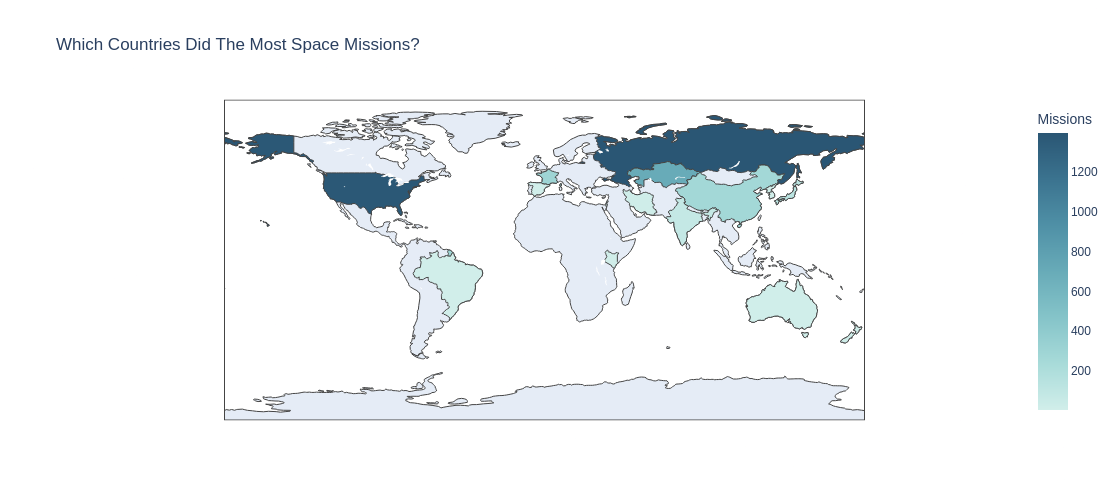

In [310]:
country_total_count = data.groupby("ISO", as_index=True).size().sort_values(ascending=False)

fig = px.choropleth(country_total_count,
                    locations=country_total_count.index,
                    color=country_total_count.values,
                    hover_name=country_total_count.index,
                    title="Which Countries Did The Most Space Missions?",
                    color_continuous_scale="teal",
                    width=800,
                    height=500
)

fig.update_traces(hovertemplate='%{location}: %{z} Missions')
fig.update_layout(coloraxis_colorbar_title="Missions").show()

### Expenses In Space Missions By Countries

In [311]:
print('For unfortunate reason, the USSR didn\'t archive or reveal any of it spatial missions expenses, making impossible to view a Choropleth map of how much was spent on space missions.')

For unfortunate reason, the USSR didn't archive or reveal any of it spatial missions expenses, making impossible to view a Choropleth map of how much was spent on space missions.


### Number Of Failures In Space Missions By Countries


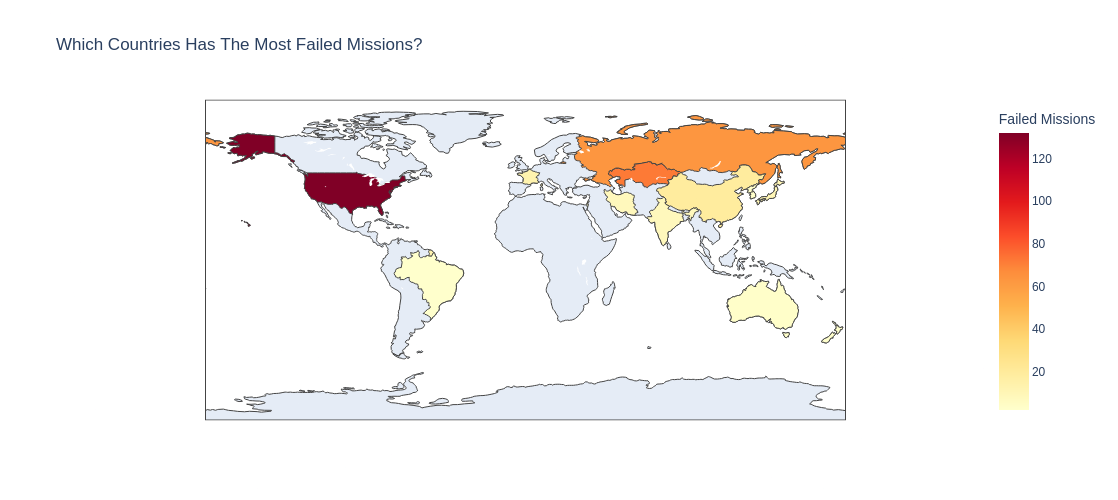

In [312]:
country_failed_count = data[data['Mission_Status'] == 'Failure'].groupby('ISO', as_index=True).size().sort_values(ascending=False)

fig = px.choropleth(country_failed_count,
                    locations=country_failed_count.index,
                    color=country_failed_count.values,
                    hover_name=country_failed_count.index,
                    title="Which Countries Has The Most Failed Missions?",
                    color_continuous_scale="YlOrRd",
                    width=800,
                    height=500
)

fig.update_traces(hovertemplate='%{location}: %{z} Failed Missions')
fig.update_layout(coloraxis_colorbar_title="Failed Missions").show()

### Mission Status In Every Spatial Organisation Form Each Country

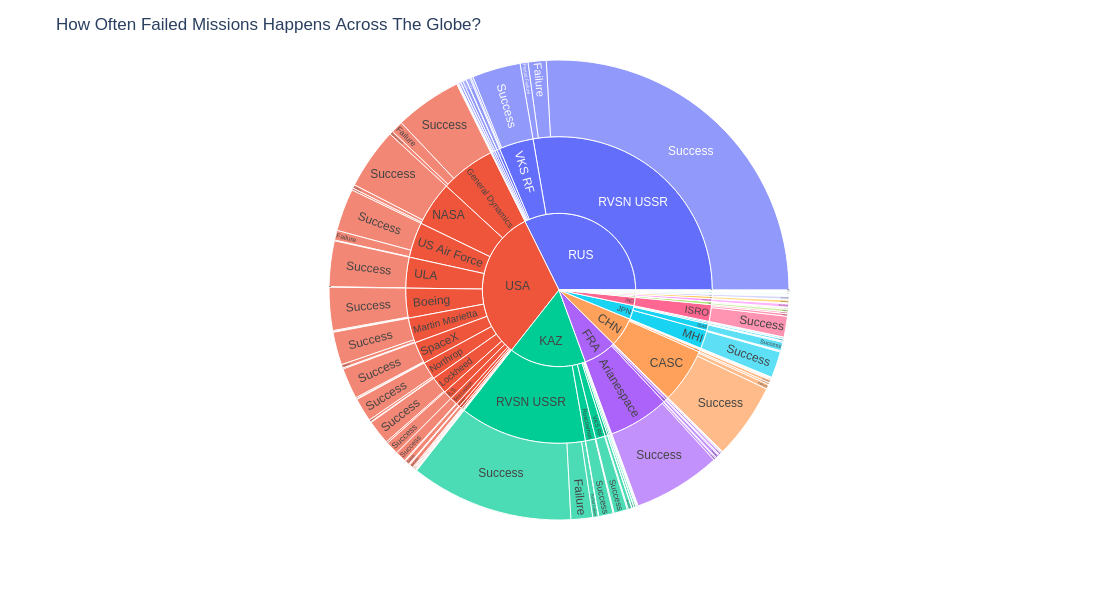

In [313]:
country_organisation_count = data.groupby(['ISO', 'Organisation', 'Mission_Status']).size().reset_index(name='count')

fig = px.sunburst(country_organisation_count, path=['ISO', 'Organisation', 'Mission_Status'], values='count', width=800, height=600)
fig.update_layout(title='How Often Failed Missions Happens Across The Globe?')
fig.update_traces(hovertemplate='%{label}: %{value}').show()

# Organisations Analysis

### Number Of Launches Per Organisation

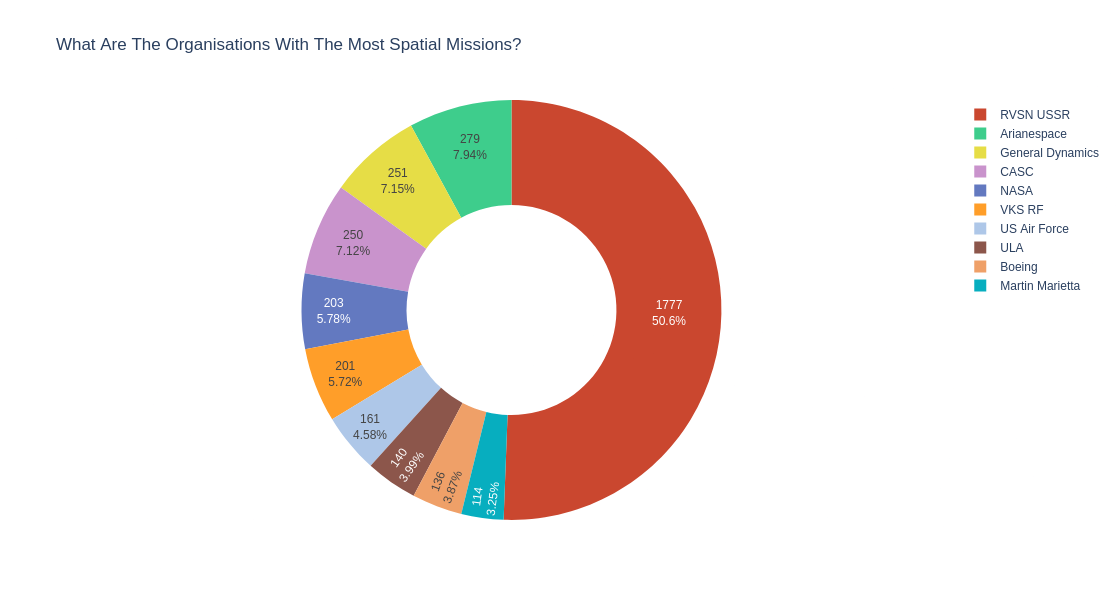

In [314]:
organisation_mission_count = (
    data.groupby("Organisation", as_index=True).size().sort_values(ascending=False)[:10]
)

fig = px.pie(
    values=organisation_mission_count.values,
    names=organisation_mission_count.index,
    title="What Are The Organisations With The Most Spatial Missions?",
    color_discrete_sequence = ["#ca472f","#3ecd8c", "#e6dd46","#c993cc","#6379c0", "#ff9e29","#aeC7E8","#8c564b","#efa068","#07aebf"],
    width=800,
    height=600,
    hole=0.5,
)

fig.update_traces(hovertemplate="%{label}: %{value} Missions (%{percent})", textinfo="value+percent").show()

### Total Expenses Of Each Organisation In Spatial Exploration

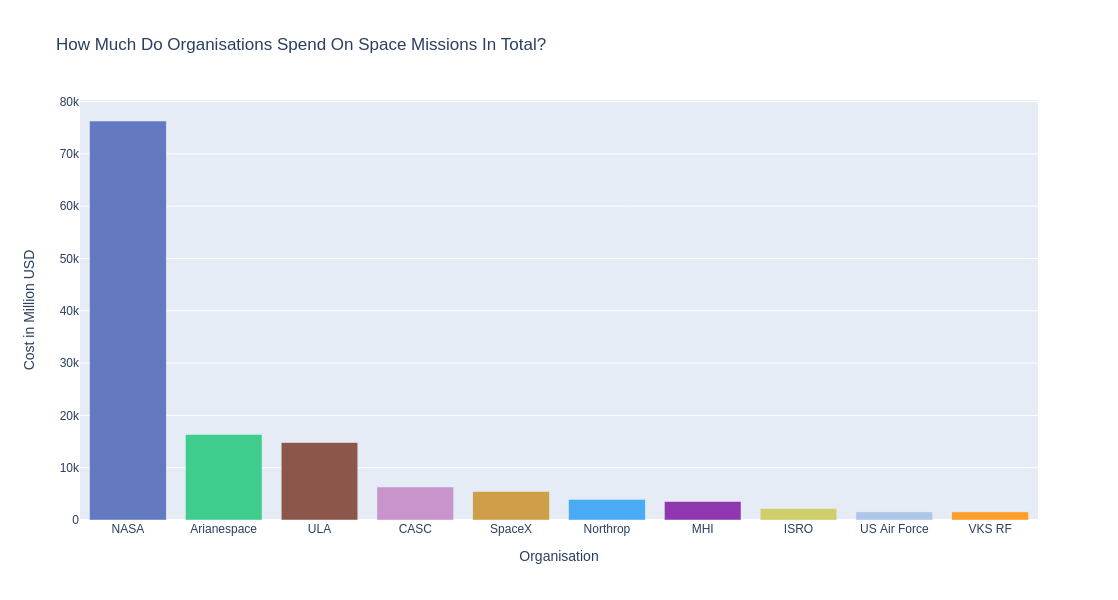

In [315]:
organisation_total_expenses = data.groupby("Organisation", as_index=False).agg({"Price": "sum"}).sort_values(by="Price", ascending=False)[:11]
organisation_total_expenses = organisation_total_expenses.drop(organisation_total_expenses[organisation_total_expenses["Organisation"] == "RVSN USSR"].index)

fig = px.bar(
    organisation_total_expenses,
    x="Organisation",
    y="Price",
    color="Organisation",
    title="How Much Do Organisations Spend On Space Missions In Total?",
    color_discrete_sequence=["#6379c0","#3ecd8c","#8c564b","#c993cc","#cf9e49","#49aaf6","#9037b0","#d0d06a","#aec7e8", "#ff9e29"],
    width=800,
    height=600,
)

fig.update_traces(showlegend=False)
fig.update_layout(yaxis_title="Cost in Million USD").show()

### Expenses Spent By Organisations Per Launch

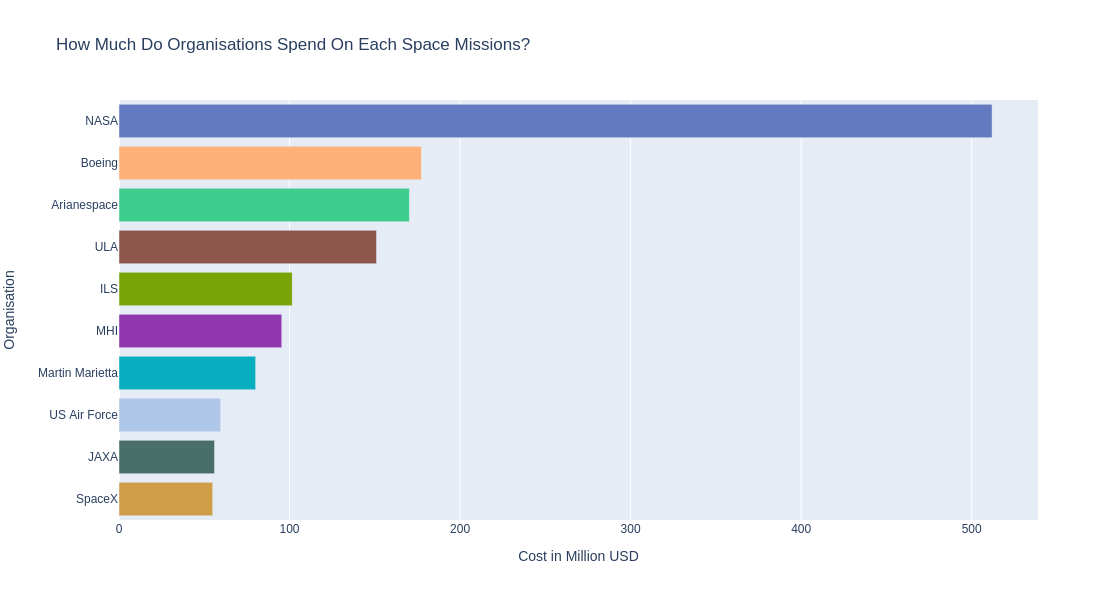

In [316]:
organisation_each_expenses = data.groupby("Organisation", as_index=False).agg({"Price": "mean"}).sort_values(by="Price", ascending=False)[1:11]

fig = px.bar(
    organisation_each_expenses,
    orientation="h",
    y="Organisation",
    x="Price",
    color="Organisation",
    title="How Much Do Organisations Spend On Each Space Missions?",
    color_discrete_sequence=["#6379c0","#ffb078","#3ecd8c","#8c564b","#79a406","#9037b0","#07aebf","#aec7e8","#496F68","#cf9e49"],
    width=800,
    height=600,
)

fig.update_traces(showlegend=False)
fig.update_layout(xaxis_title="Cost in Million USD").show()

### Yearly Launches Over Time For Each Organisation

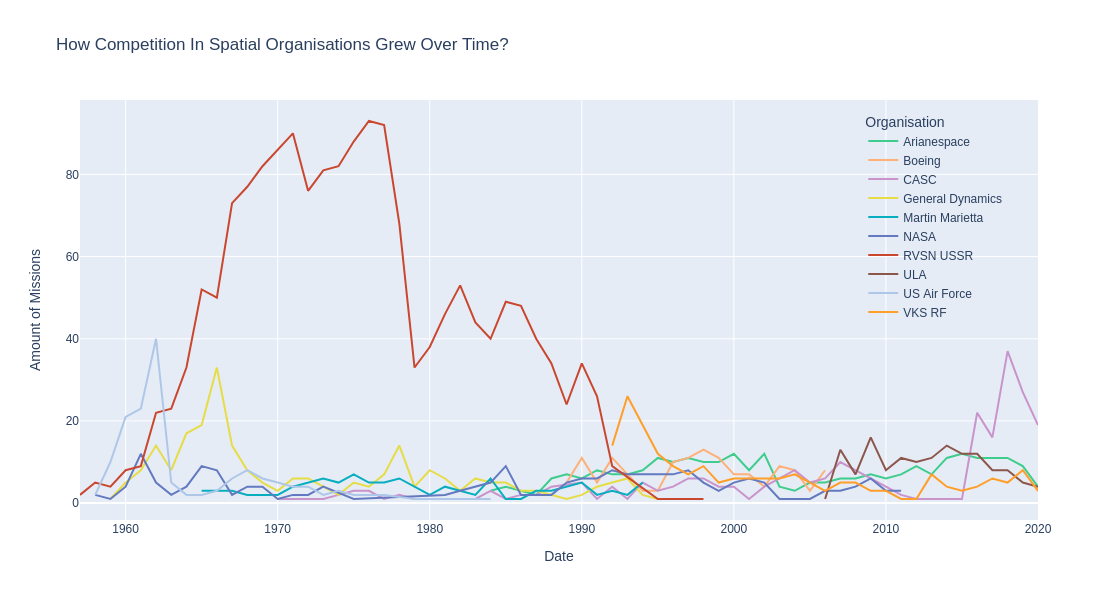

In [317]:
competition_between_organisation = data[data["Organisation"].isin(data["Organisation"].value_counts().nlargest(10).index)].groupby(["Organisation", "Year"]).size().reset_index(name="Missions")

fig = px.line(
    competition_between_organisation,
    x="Year",
    y="Missions",
    color="Organisation",
    title="How Competition In Spatial Organisations Grew Over Time?",
    color_discrete_sequence=["#3ecd8c","#ffb078","#c993cc","#e6dd46","#07aebf","#6379c0","#ca472f","#8c564b","#aeC7E8","#ff9e29"],
    width=800,
    height=600,
)

fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Amount of Missions",
    legend=dict(x=0.97, y=0.98, xanchor="right", yanchor="top", bgcolor="rgba(0,0,0,0)"),
)

fig.update_traces(hovertemplate="%{x} : %{y} Missions").show()